<a href="https://colab.research.google.com/github/averma12/Fastai-p22022-nbs-notes/blob/main/Matrix_Multiplications_from_foundations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from pathlib import Path
import pickle, gzip, math, os, time, shutil, matplotlib as mpl, matplotlib.pyplot as plt

We are importing some base libraries which are needed for matrix multiplication from scratch.

Path is a class from the pathlib module that provides an object-oriented way of working with file paths. pickle is a module that allows you to serialize Python objects, which means you can convert them into a format that can be stored on disk or transmitted over a network. gzip is a module that provides support for gzip compression and decompression. math is a module that provides access to mathematical functions. os is a module that provides a way of using operating system dependent functionality. time is a module that provides functions for working with time. shutil is a module that provides functions for copying and deleting files. matplotlib is a plotting library for creating static, animated, and interactive visualizations in Python. mpl is a namespace within matplotlib that provides a way to access certain functionality from the library. plt is a function within matplotlib that provides a way to create plots.

In [3]:
MNIST_URL='https://github.com/mnielsen/neural-networks-and-deep-learning/blob/master/data/mnist.pkl.gz?raw=true'
path_data = Path('data')
path_data.mkdir(exist_ok=True)
path_gz = path_data/'mnist.pkl.gz'

Let's look at the above code step by step
1. The MNIST_URL is a variable pointing to a URL that we can use to download the MNIST dataset
2. path_data is a variable that creates a Path object representing a directory called data in the current working directory. This does not create a directory, the next line creates the directory
3. This creates a directory data in the cwd. It checks if the data directory exists. If not it creates the directory
4. Creates another Path object by combining the path_data object with the filename mnist.pkl.gz. This Path object represents the file mnist.pkl.gz in the data directory. Note: This does not create a file mnist_pkl.gz but it creates the object. The file will be created in the next line

Next we will download the file using urlretrieve. urlretrieve is a function from the urllib.request module in Python that allows you to download a file from a URL and save it to your local file system. Here's an example of how you might use urlretrieve to download a file:

\begin{lstlisting}
from urllib.request import urlretrieve

# URL of the file to download
url = "https://www.example.com/files/file.zip"

# Local path where the file will be saved
local_path = "C:/Users/myuser/Downloads/file.zip"

# Download the file
urlretrieve(url, local_path)
\end{lstlisting}


In [4]:
from urllib.request import urlretrieve
if not path_gz.exists(): urlretrieve(MNIST_URL, path_gz) # Download the Mnist data and save it to the path_gz defined. If exists this snippet won't be called.


The code you provided is a command that can be run from a terminal or command prompt. It consists of the ls command, which is used to list the contents of a directory, and the -l flag, which tells ls to display the output in a long format that includes additional details about the files and directories in the specified directory.

The ! tells jupyter to execute this as a shell command

In [5]:
!ls -l data # The total here specifies the size of the file in kilobytes

total 16656
-rw-r--r-- 1 root root 17051982 Dec 10 17:23 mnist.pkl.gz


In [6]:
with gzip.open(path_gz, 'rb') as f: ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

We are now using the gzip module over the file stored in path_gz. We open the file using the with context in binary read mode. The file object is assigned to the variable f, which is used to read data from the file. 

After the file is opened, the code uses the pickle module to deserialize the data in the file. This means that it converts the data in the file from a serialized format (i.e., a binary representation of a Python object) back into a Python object. In this case, the data in the file is expected to be a tuple containing three other tuples, which are themselves expected to contain pairs of arrays. The pickle.load method is used to deserialize the data and assign it to a tuple of three tuples, which are then assigned to the variables (x_train, y_train), (x_valid, y_valid), _.

This code relies on the assumption that the data in the file is correctly formatted and that the file can be successfully opened and read. If either of these assumptions is not met, the code may produce an error. For example, if the file does not exist or is not a valid gzip-compressed file, the gzip.open function will raise an error. If the data in the file is not in the expected format, the pickle.load function will raise an error. In either case, the code will not execute successfully.






In [7]:
lst1 = list(x_train[0]) ##Here we look at the first example of the train dataset
vals = lst1[200:210]
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [8]:
## What is the len of each item in x_train
len(lst1)

784

Why 784. Because it is a 28 * 28 image.

In [9]:
## Now we want to use this to create a matrix of 28 * 28. 
## We want to do this because we want to render this image using matplotlib
## so now we look at creating this image using python tricks

In [10]:
def chunks(x, sz):
    for i in range(0, len(x), sz): yield x[i:i+sz]

The function returns an iterator that yields consecutive chunks of the input x, where each chunk has a size of sz elements.



In [11]:
##Example of chunks code
# Create a list of numbers from 1 to 10
x = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

# Create an iterator that yields chunks of size 3
chunk_iter = chunks(x, 3)

# Print each chunk
for chunk in chunk_iter:
    print(chunk)


[1, 2, 3]
[4, 5, 6]
[7, 8, 9]
[10]


In [12]:
## So let's use for our use case
list(chunks(vals, 5)) ## this prints all the iterations as part of a list.

[[0.0, 0.0, 0.0, 0.19140625, 0.9296875],
 [0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]]

In [ ]:
## Now we want this to show 28 * 28 images. 
## We will pass this to matplotlib to render the image
## matplotlib needs the values as a 2D array.

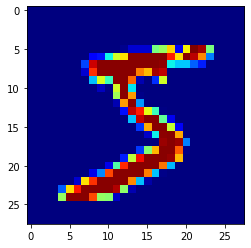

In [14]:
mpl.rcParams['image.cmap'] = 'jet'
plt.imshow(list(chunks(lst1, 28)));

The first line of the code sets a default colormap for images to gray, which tells matplotlib to use the gray colormap when plotting images. This means that the image will be displayed in grayscale, with black pixels representing low intensity values and white pixels representing high intensity values.

The second line of code uses the plt.imshow function to plot the image. The input to this function is the result of calling the chunks function on the lst1 variable, with a chunk size of 28. This means that the chunks function will split lst1 into consecutive chunks of size 28 and return an iterator that yields these chunks. The plt.imshow function then plots each chunk as a row in the image, with the first chunk representing the top row and the last chunk representing the bottom row.

We can experiment with different colors for the colormap. for grayscale images the best color is gray, but I tried jet for experiments.

- A colormap is a mapping of data values to colors.
- Colormaps are used to specify the colors that should be used to represent different data values in a plot.
- There are many built-in colormaps available in `matplotlib`, such as `gray`, `viridis`, and `jet`.
- You can also define your own custom colormaps if desired.
- The choice of colormap can have a significant impact on the appearance of a plot.
- When plotting a grayscale image, it is recommended to use a grayscale colormap, such as `gray`, to accurately represent the intensity values in the image.
- To specify a colormap when plotting data with `matplotlib`, you can use the `cmap` parameter of the `imshow` or `pcolor` function. For example:

\begin{lstlisting}
#Plot data using the "viridis" colormap
plt.imshow(data, cmap="viridis")
\end{lstlisting}

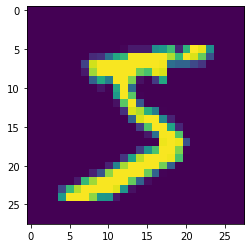

In [15]:
# Plot data using the "viridis" colormap
plt.imshow(list(chunks(lst1, 28)), cmap="viridis")

In [16]:
from itertools import islice

## A brief word about itertools
Itertools is a module in Python that provides various functions which work on iterators to produce complex iterators. It is designed to be memory efficient, and it enables us to iterate over data structures such as lists and strings.

An iterator is an object that produces a sequence of values, one at a time, when it is iterated over in a for loop or with other language constructs. The itertools library provides many functions for creating and manipulating iterators, which can be useful for working with large amounts of data in a memory-efficient way.

One of the most commonly used Itertools functions is islice(). It takes 4 parameters, an iterable container, start position, end position, and step size. The islice() function selectively prints the values mentioned in its iterable container passed as an argument. For example, if we have a list of numbers, we can use islice() to extract certain elements from that list.

Here's an example of using the islice class to create a new iterator that produces only the first 10 values from an input iterator:

In [18]:
from itertools import islice
  
  
# Slicing the range function
for i in islice(range(20), 5): 
    print(i)
      
      
li = [2, 4, 5, 7, 8, 10, 20] 
  
# Slicing the list
print(list(islice(li, 1, 6, 2))) 

0
1
2
3
4
[4, 7, 10]


In [47]:
it = iter(vals)
islice(it, 5)

The above code defines a variable named it that contains an iterator over the values in a list named vals. The code then calls the islice function from the itertools library, passing it as the first argument and 5 as the second argument. This creates a new iterator that produces only the first five values from the input iterator it.

The islice function is used to create a new iterator that produces a slice of an input iterator, starting at a specified start index and ending at a specified stop index. This allows you to create a new iterator that produces only a subset of the values from the original iterator. In this case, the code is using the islice function to create a new iterator that produces only the first five values from the input iterator it.

It is worth noting that the code you provided does not actually do anything with the new iterator returned by the islice function. In order to use the new iterator, you would need to iterate over it in a for loop or with other language constructs.

In [49]:
first_five = islice(it, 5)

# Iterate over the first 5 values from the input iterator
for val in first_five:
    # Do something with the value
    print(val)

0.0
0.0
0.19140625
0.9296875
0.98828125


In [32]:
vals

[0.0,
 0.0,
 0.0,
 0.19140625,
 0.9296875,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125,
 0.98828125]

In [41]:
next(islice(it,5))

0.98828125

In [44]:
list(islice(it, 5))

[0.0, 0.0, 0.0, 0.19140625, 0.9296875]

In [45]:
list(islice(it, 5))

[0.98828125, 0.98828125, 0.98828125, 0.98828125, 0.98828125]

In [46]:
list(islice(it, 5))

[]

In [50]:
it = iter(lst1)
img = list(iter(lambda: list(islice(it, 28)), []))

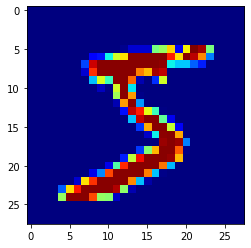

In [51]:
plt.imshow(img);

This lambda function is used as the first argument to the iter function, which creates an iterator that repeatedly calls the provided function until the function returns the sentinel value [].

In [52]:
class Matrix:
    def __init__(self, xs): self.xs = xs
    def __getitem__(self, idxs): return self.xs[idxs[0]][idxs[1]]

The __init__ method is the class constructor, which is called when a new Matrix object is created. The __init__ method takes a single argument, xs, which is a list of lists containing the data for the matrix. The __init__ method assigns this list of lists to an instance variable named xs, which will be used to store the data for the matrix.

The __getitem__ method is a special method that is called when the Matrix class is used with the indexing operator ([]). The __getitem__ method takes a single argument, idxs, which is a tuple containing the row and column indices of the data element to be accessed. The __getitem__ method returns the value of the data element at the specified row and column in the xs instance variable.



In [53]:
# Create a Matrix object with the specified data
matrix = Matrix([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# Access the element at row 1, column 2
print(matrix[1, 2]) # prints 6

6


In [54]:
import torch
from torch import tensor